# 0. Exploratory Data Analysis

## 1. Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

/var/folders/4z/2c3pgnzn7076nk50w4ssvx540000gn/T/ipykernel_28984/2648639810.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 2. Read the Data

**Context**

This dataset comes from research by Semeion, Research Center of Sciences of Communication. The original aim of the research was to correctly classify the type of surface defects in stainless steel plates, with 6 classes of possible defects (plus "other"). The Input vector was made up of 27 indicators that approximately describe the geometric shape of the defect and its outline. 

**Content**

There are 34 fields. The first 27 fields describe some kind of steel plate faults seen in images. The last seven columns are one hot encoded classes of defects:

- Pastry
- Z_Scratch
- K_Scatch
- Stains
- Dirtiness
- Bumps
- Other_Faults

In [2]:
# Read the data
dataset = pd.read_csv(r'/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/raw/faults.csv')
dataset.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


## 3. Data Understanding

In [3]:
# Understanding the shape of the dataset
print(f"The shape of the dataset is: {dataset.shape}")

The shape of the dataset is: (1941, 34)


In [4]:
# General information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [5]:
# Check for missing values
dataset.isnull().values.any()

False

In [6]:
# Define the features and the target columns
x = dataset.iloc[:,0:27]
y = dataset.iloc[:,27:34]

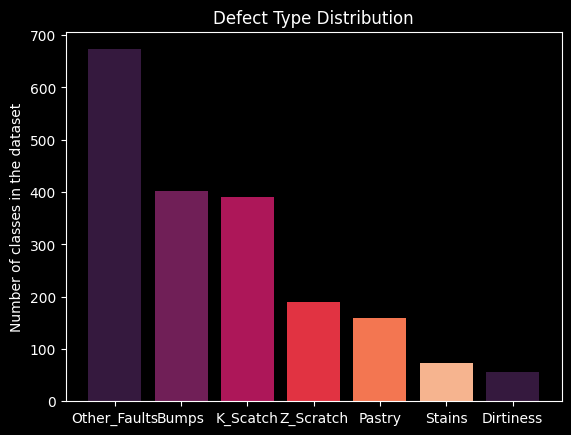

In [7]:
# Get the class balance over the dataset
target = y
defect_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

# Transform the dataset from one hot encoded to descriptive
target['Defect_Type'] = target[defect_columns].idxmax(axis=1)
target = target.drop(defect_columns, axis=1)

# Plot the class balance
data = target['Defect_Type'].value_counts()
plt.style.use("dark_background")
tcb = plt.bar(data.index, data.values, color=sns.color_palette("rocket"))
plt.ylabel('Number of classes in the dataset')
plt.title('Defect Type Distribution')
plt.show()

The dataset is unbalanced, with Dirtiness as the minority class, while the Other_Faults is the most commun defect type over the data.

## 4. Scaling the Data & Correlations

MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. We use this as the scaler choice to transform the feature and preserve the shape of the dataset (no distortion).

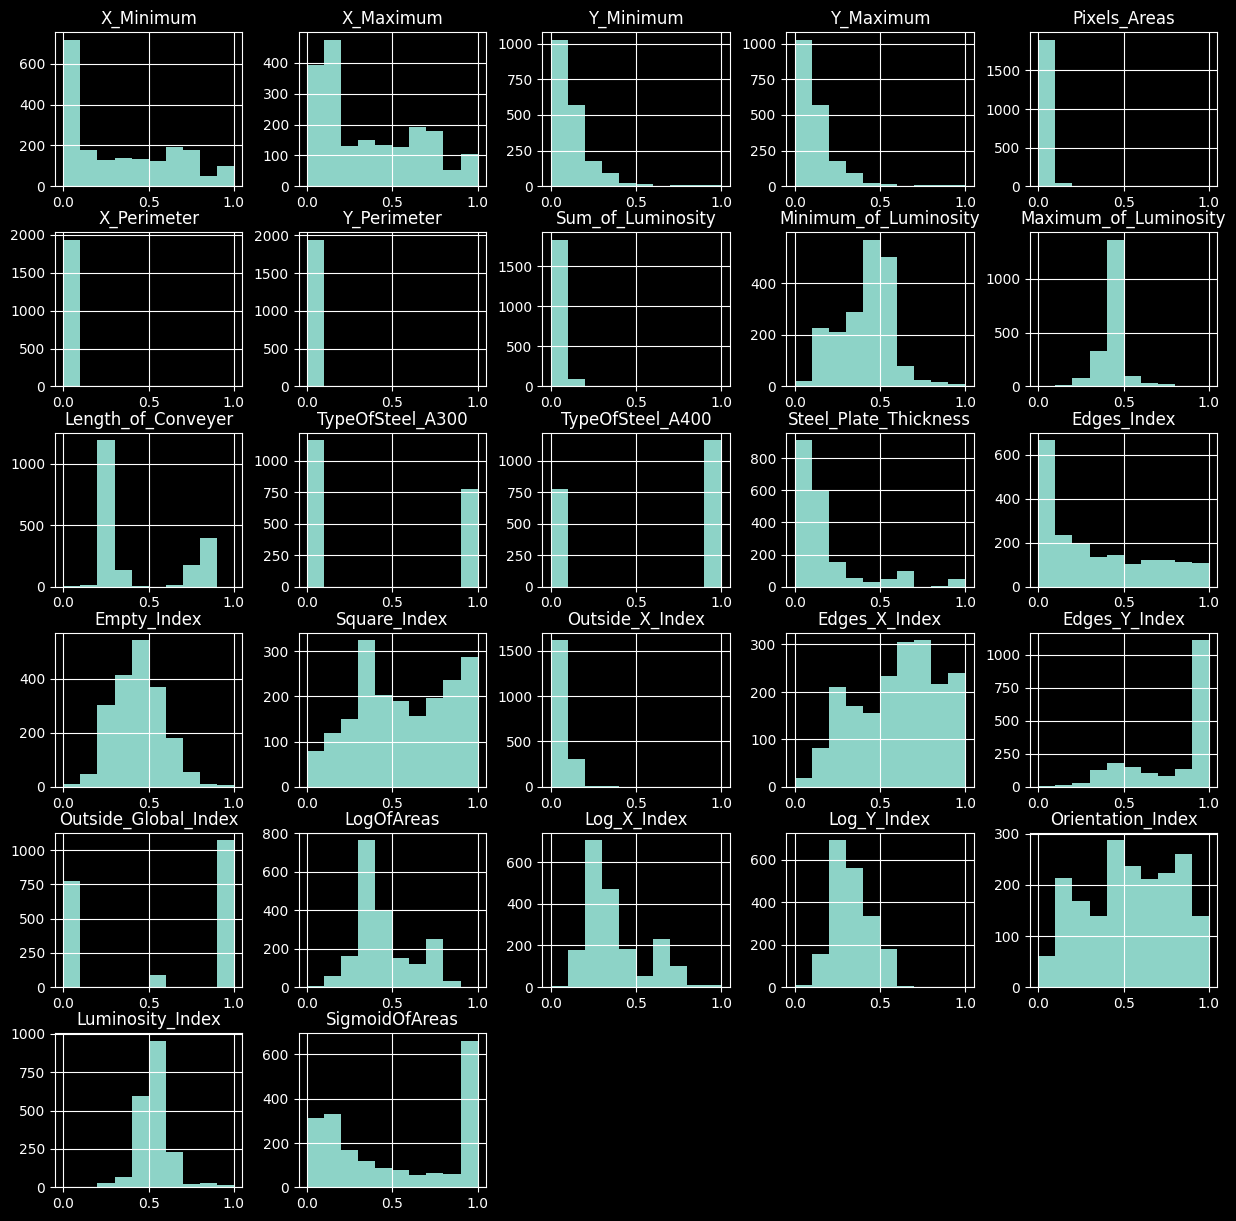

In [8]:
# Scaling
minmax_scaler = MinMaxScaler(feature_range =(0,1))
x_minmax_scale = pd.DataFrame(minmax_scaler.fit_transform(x), columns = x.columns)

# Histogram
x_minmax_scale.hist(figsize=(15, 15))
plt.show()

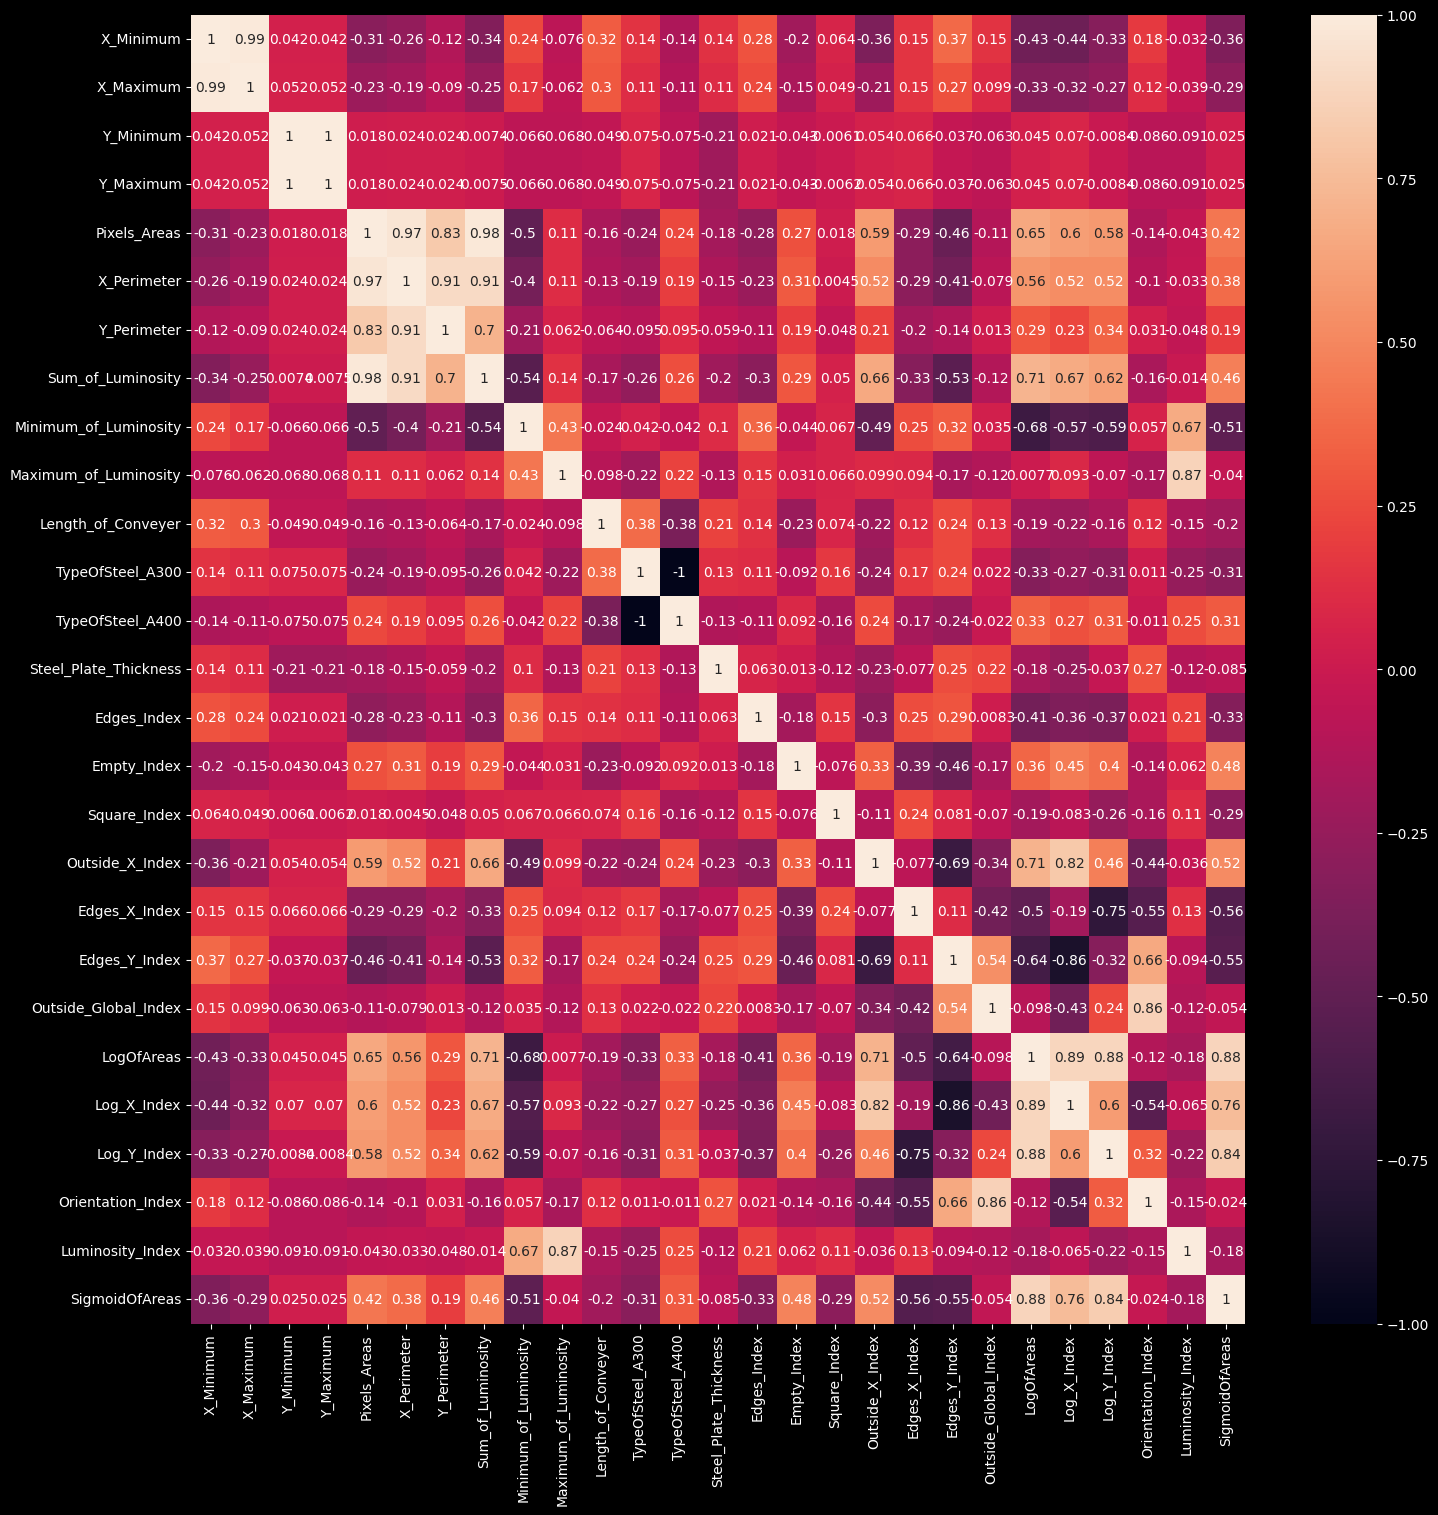

In [9]:
plt.figure(figsize=(17,17))
sns.heatmap(x_minmax_scale.corr(),annot=True)
plt.show()

The above correlation matrix visually represents the Pearson correlation values among the dataset features using a color map. 

We can spot several notable direct correlations between size metrics, such as Pixels_Areas and perimeters in both X and Y.

Besides the correlation between Luminosity features and defect size features, revealing that larger defects lead to brighter regions.

# 5. Saving

In [10]:
# Saving the x dataset
x.to_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/0_features.csv", index=False)

# Saving the original y target
y.to_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/1_target_onehot.csv", index=False)

# Saving the categorical target
target.to_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/2_target_categorical.csv", index=False)